# Project: Choosing the "right" $k$
There are two widely used methods to get a good value for $k$.
- The elbow method
- The silhouette coefficient

## 1. The elbow method
- Make a chart over different $k$ values
- If the line chart resembles an arm, then the “elbow” is a good indication of a best fit at that point

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Generate data

#Generate some random numbers
data = np.random.randn(400, 2)

#Do some grouping to the data by shifting the data
data[:100] += 5, 5
data[100:200] += 10, 10
data[200:300] += 10, 5
data[300:] += 5, 10

In [5]:
#Create models with different k values

sse = [] #create an empty list that will store the sum of squared errors per model

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    sse.append(model.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


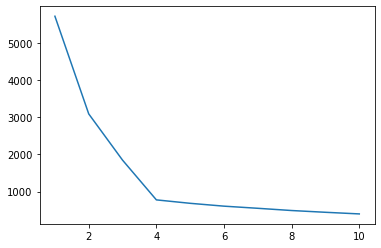

In [14]:
#Create a plot of the models' sse over the different k values
fig, ax = plt.subplots()

ax.plot(range(1, 11), sse)

In [ ]:
## The plot forms an arm and the elbow is at k = 4
## Therefore k = 4 is the best values for the number of clusters

## 2. The silhouette coefficient
- a measure of cluster cohesion and separation. 
- It quantifies how well a data point fits into its assigned cluster based on two factors:


- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

In [9]:
#import libraries
from sklearn.metrics import silhouette_score

In [10]:
#Calculate Silouette Coefficients
#Iterate over different values of k

silouette_coefficients = []

for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    silouette_coefficients.append(silhouette_score(data, model.labels_))

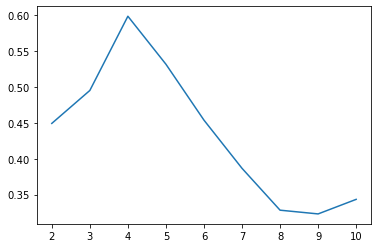

In [15]:
#plot the results

fig, ax = plt.subplots()

ax.plot(range(2, 11), silouette_coefficients)

In [ ]:
#The best value of k corresponds to the most positive value of silouette coefficient.
#The best value of k is 4